In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\Users\akash\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\akash\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('customer_segmentation_data.csv')

In [3]:
df

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
...,...,...,...,...,...,...,...,...,...
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16


In [4]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [5]:
df.tail()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16
999,1000,36,Female,90420,7,2,31,Groceries,669.26


In [6]:
df.shape

(1000, 9)

In [7]:
df.columns

Index(['id', 'age', 'gender', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'preferred_category', 'last_purchase_amount'],
      dtype='object')

In [8]:
df.columns.to_list()

['id',
 'age',
 'gender',
 'income',
 'spending_score',
 'membership_years',
 'purchase_frequency',
 'preferred_category',
 'last_purchase_amount']

In [9]:
df.dtypes

id                        int64
age                       int64
gender                   object
income                    int64
spending_score            int64
membership_years          int64
purchase_frequency        int64
preferred_category       object
last_purchase_amount    float64
dtype: object

In [10]:
df.nunique().to_frame('no. of unique values')

,no. of unique values
id,1000
age,52
gender,3
income,996
spending_score,100
membership_years,10
purchase_frequency,50
preferred_category,5
last_purchase_amount,994


In [11]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [13]:
df.isnull().sum()

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

In [14]:
df.drop(columns='id',inplace=True)

In [15]:
numerical_column = []
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_column.append(i)
 
numerical_column

['age',
 'income',
 'spending_score',
 'membership_years',
 'purchase_frequency',
 'last_purchase_amount']

In [16]:
# Summary statistics of numerical columns
df.describe()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [17]:
# Distribution of categorical variables
gender_distribution = df['gender'].value_counts()
category_distribution = df['preferred_category'].value_counts()
print(gender_distribution)
print('\n')
print(category_distribution)

gender
Male      357
Other     327
Female    316
Name: count, dtype: int64


preferred_category
Electronics      215
Sports           210
Home & Garden    206
Groceries        199
Clothing         170
Name: count, dtype: int64


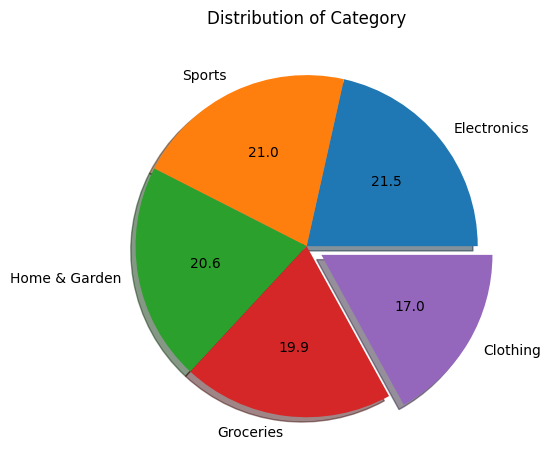

In [18]:
df['preferred_category'].value_counts().plot(kind='pie',autopct="%1.1f",explode = (0, 0, 0, 0,.1),shadow=True)
plt.title('Distribution of Category')
plt.ylabel('')
plt.tight_layout()
plt.show()

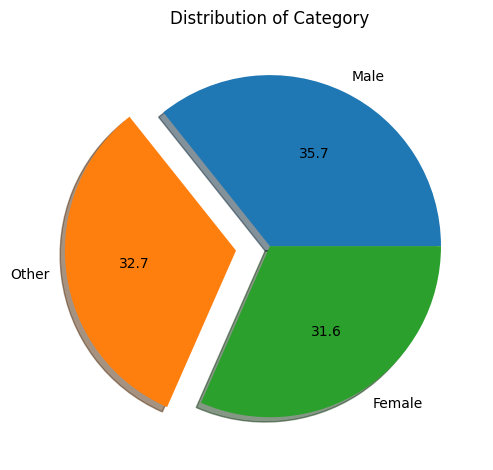

In [19]:
df['gender'].value_counts().plot(kind='pie',autopct="%1.1f",explode = (0, 0.2,0),shadow=True)
plt.title('Distribution of Category')
plt.ylabel('')
plt.tight_layout()
plt.show()

# check outliers

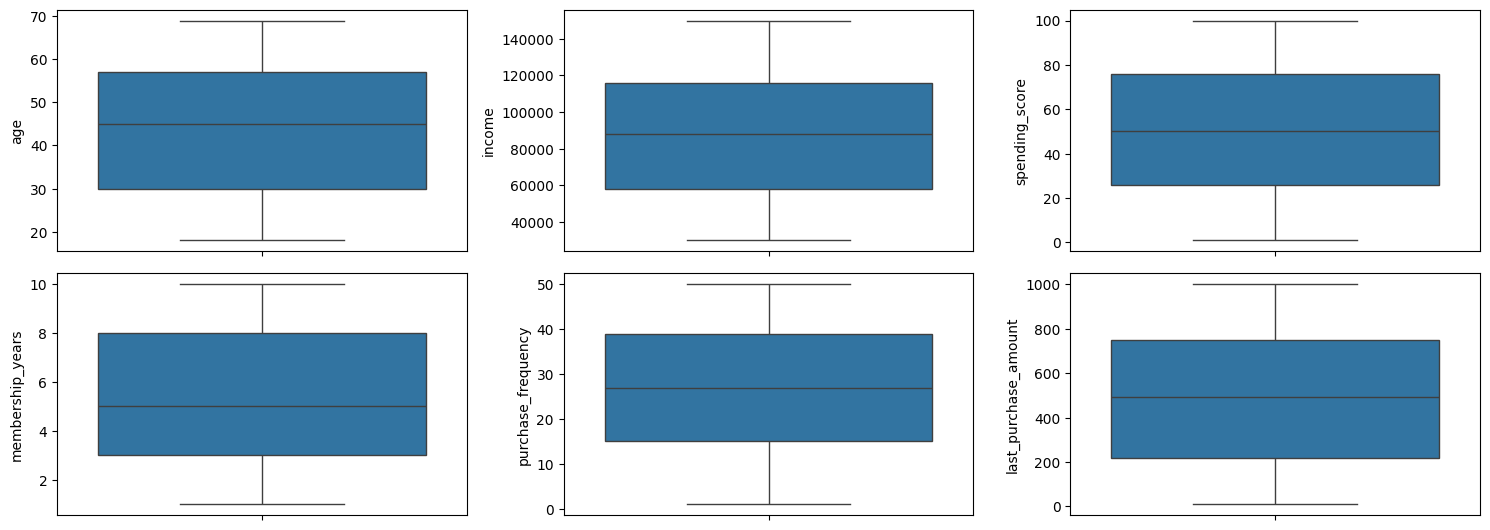

In [20]:
plt.figure(figsize=(15,8))
p = 1

for i in numerical_column:
    if p <= 8:
        ax = plt.subplot(3,3,p)
        sns.boxplot(df[i])
    p+=1
plt.tight_layout()    

By above plot, we observe that there are no outlier present in dataset.

# check normal distribution

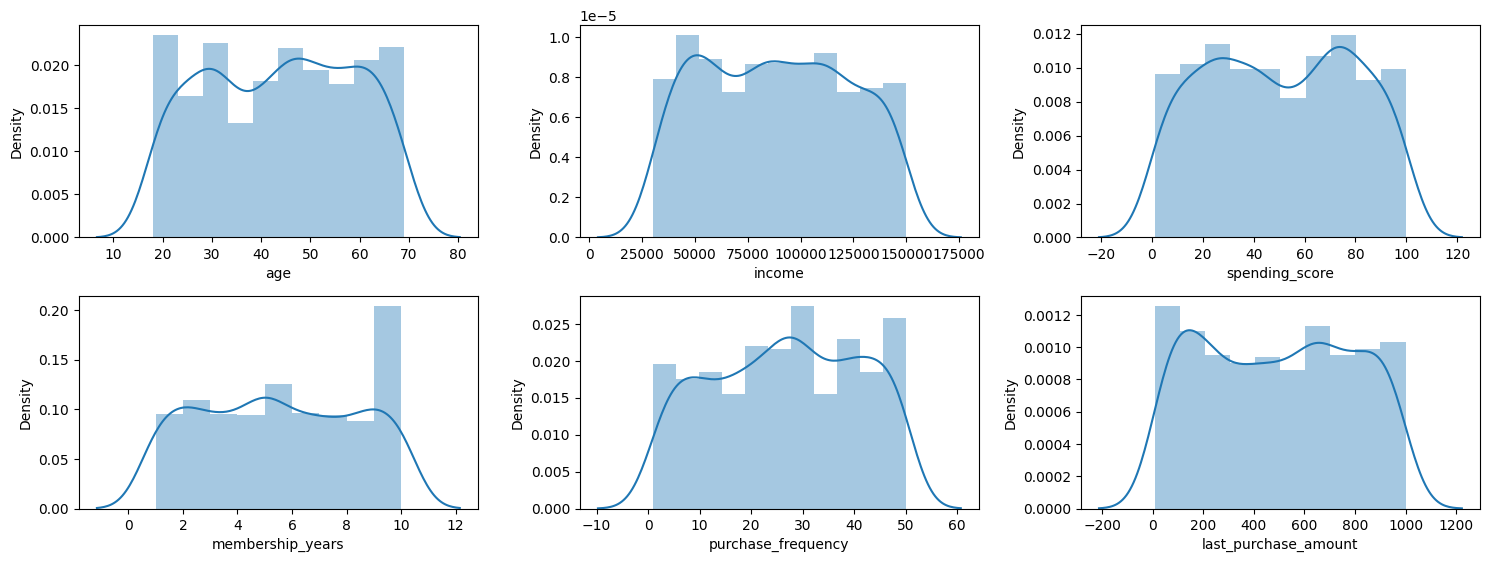

In [21]:
plt.figure(figsize=(15,8))
p = 1

for i in numerical_column:
    if p <= 8:
        ax = plt.subplot(3,3,p)
        sns.distplot(df[i])
    p+=1
plt.tight_layout() 

we observe that the data are almost normally distributed

# check correlation

In [22]:
numeric_df = df.select_dtypes(include=['number'])

<Axes: >

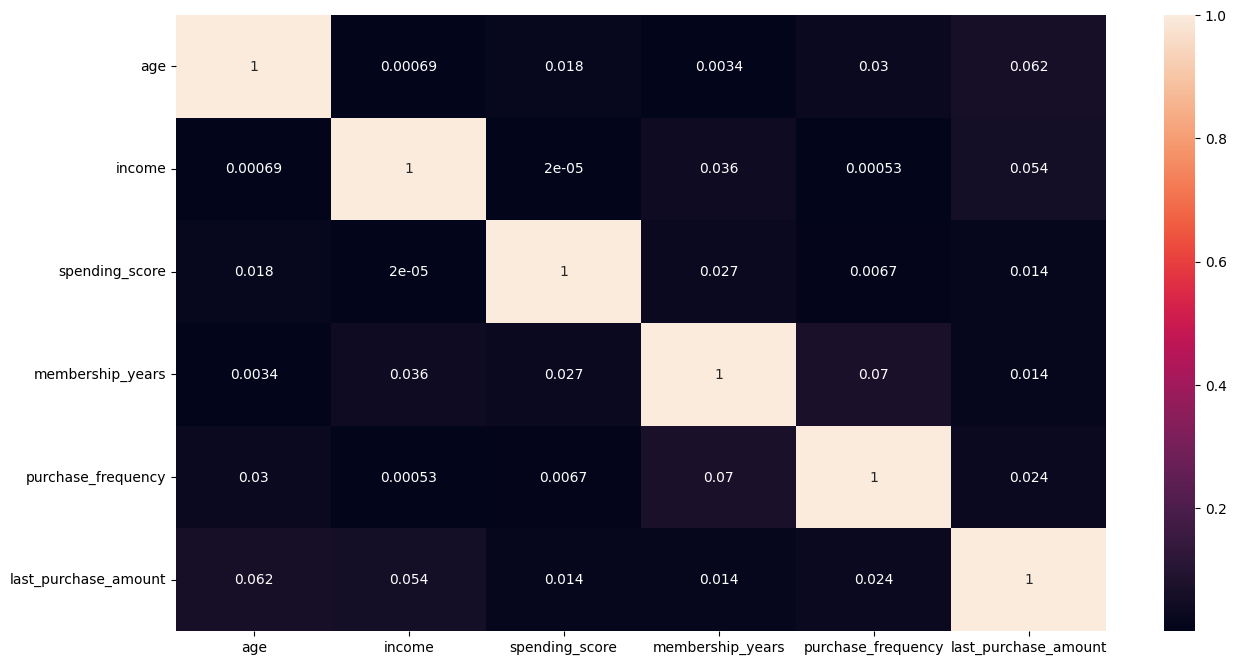

In [23]:
df_corr = numeric_df.corr().abs()

plt.figure(figsize=(15,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})

By the plot, There are no correlation with each other.

Let's proceed with the clustering analysis using the K-means algorithm. We'll use the following features for clustering:

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(df[numerical_column])

# Determine the optimal number of clusters using the elbow method

In [25]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

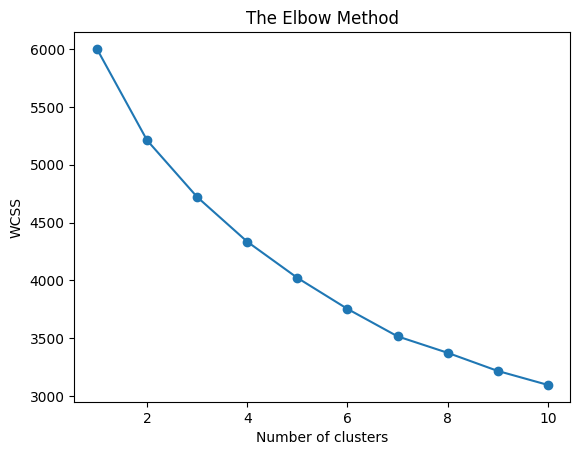

In [26]:
plt.plot(range(1,11),wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
# Apply K-means clustering with 4 clusters

kmeans = KMeans(n_clusters = 4, init='k-means++', random_state = 42)
clusters = kmeans.fit_predict(x)
print(clusters)

[3 3 2 1 2 0 3 3 1 1 0 1 3 1 0 2 2 0 3 3 0 3 3 3 1 3 1 0 3 0 1 1 0 3 1 0 3
 1 0 0 0 2 0 3 1 0 2 3 3 2 3 3 2 3 1 1 1 2 1 0 0 3 1 2 0 3 3 3 3 1 3 1 0 3
 2 2 1 0 0 1 2 2 3 3 0 0 1 0 0 1 0 3 1 0 3 0 2 3 0 3 0 3 0 2 0 2 3 1 3 1 0
 1 1 0 2 2 2 1 3 1 2 3 0 3 1 3 1 3 1 2 1 2 3 3 3 0 3 2 0 3 3 0 2 3 0 1 1 2
 3 2 2 0 1 1 2 3 1 1 2 0 2 2 3 2 2 1 3 3 3 1 0 0 2 1 3 3 2 2 3 2 3 2 3 0 3
 3 0 1 2 3 3 2 1 1 1 0 3 3 0 2 0 1 2 2 3 0 1 2 2 0 3 0 2 0 2 0 0 2 1 2 2 1
 2 1 2 3 1 1 3 1 0 2 0 0 0 3 1 2 2 2 3 3 0 2 0 0 1 3 2 3 0 3 2 2 3 1 0 3 1
 3 3 1 2 1 2 1 2 0 3 3 1 0 1 2 3 1 1 1 2 3 1 0 0 0 2 2 3 2 3 1 1 1 3 2 3 2
 3 0 1 2 0 2 1 3 1 3 3 1 2 2 2 0 1 2 1 0 3 0 1 3 0 0 1 0 3 1 1 3 2 3 3 1 0
 2 2 3 3 2 3 1 1 1 3 2 0 2 1 2 1 2 2 3 2 1 3 3 2 2 1 3 3 0 0 2 0 3 1 2 1 3
 3 3 3 2 0 0 2 3 3 2 1 2 2 0 3 2 2 0 3 3 2 3 2 2 2 1 0 1 0 2 3 2 0 1 0 0 3
 2 1 0 3 1 0 2 1 1 1 1 1 1 2 1 2 2 3 2 1 1 0 2 3 0 3 1 3 2 1 0 2 3 1 0 2 1
 2 1 3 3 1 1 0 0 3 0 3 1 0 1 3 2 2 1 1 2 1 2 0 1 3 2 1 1 2 2 0 0 0 2 2 3 0
 2 1 3 1 2 3 2 0 0 3 3 2 

In [28]:
# Add the cluster labels to the original dataframe

df['cluster'] = clusters

In [29]:
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,cluster
0,38,Female,99342,90,3,24,Groceries,113.53,3
1,21,Female,78852,60,2,42,Sports,41.93,3
2,60,Female,126573,30,2,28,Clothing,424.36,2
3,40,Other,47099,74,9,5,Home & Garden,991.93,1
4,65,Female,140621,21,3,25,Electronics,347.08,2


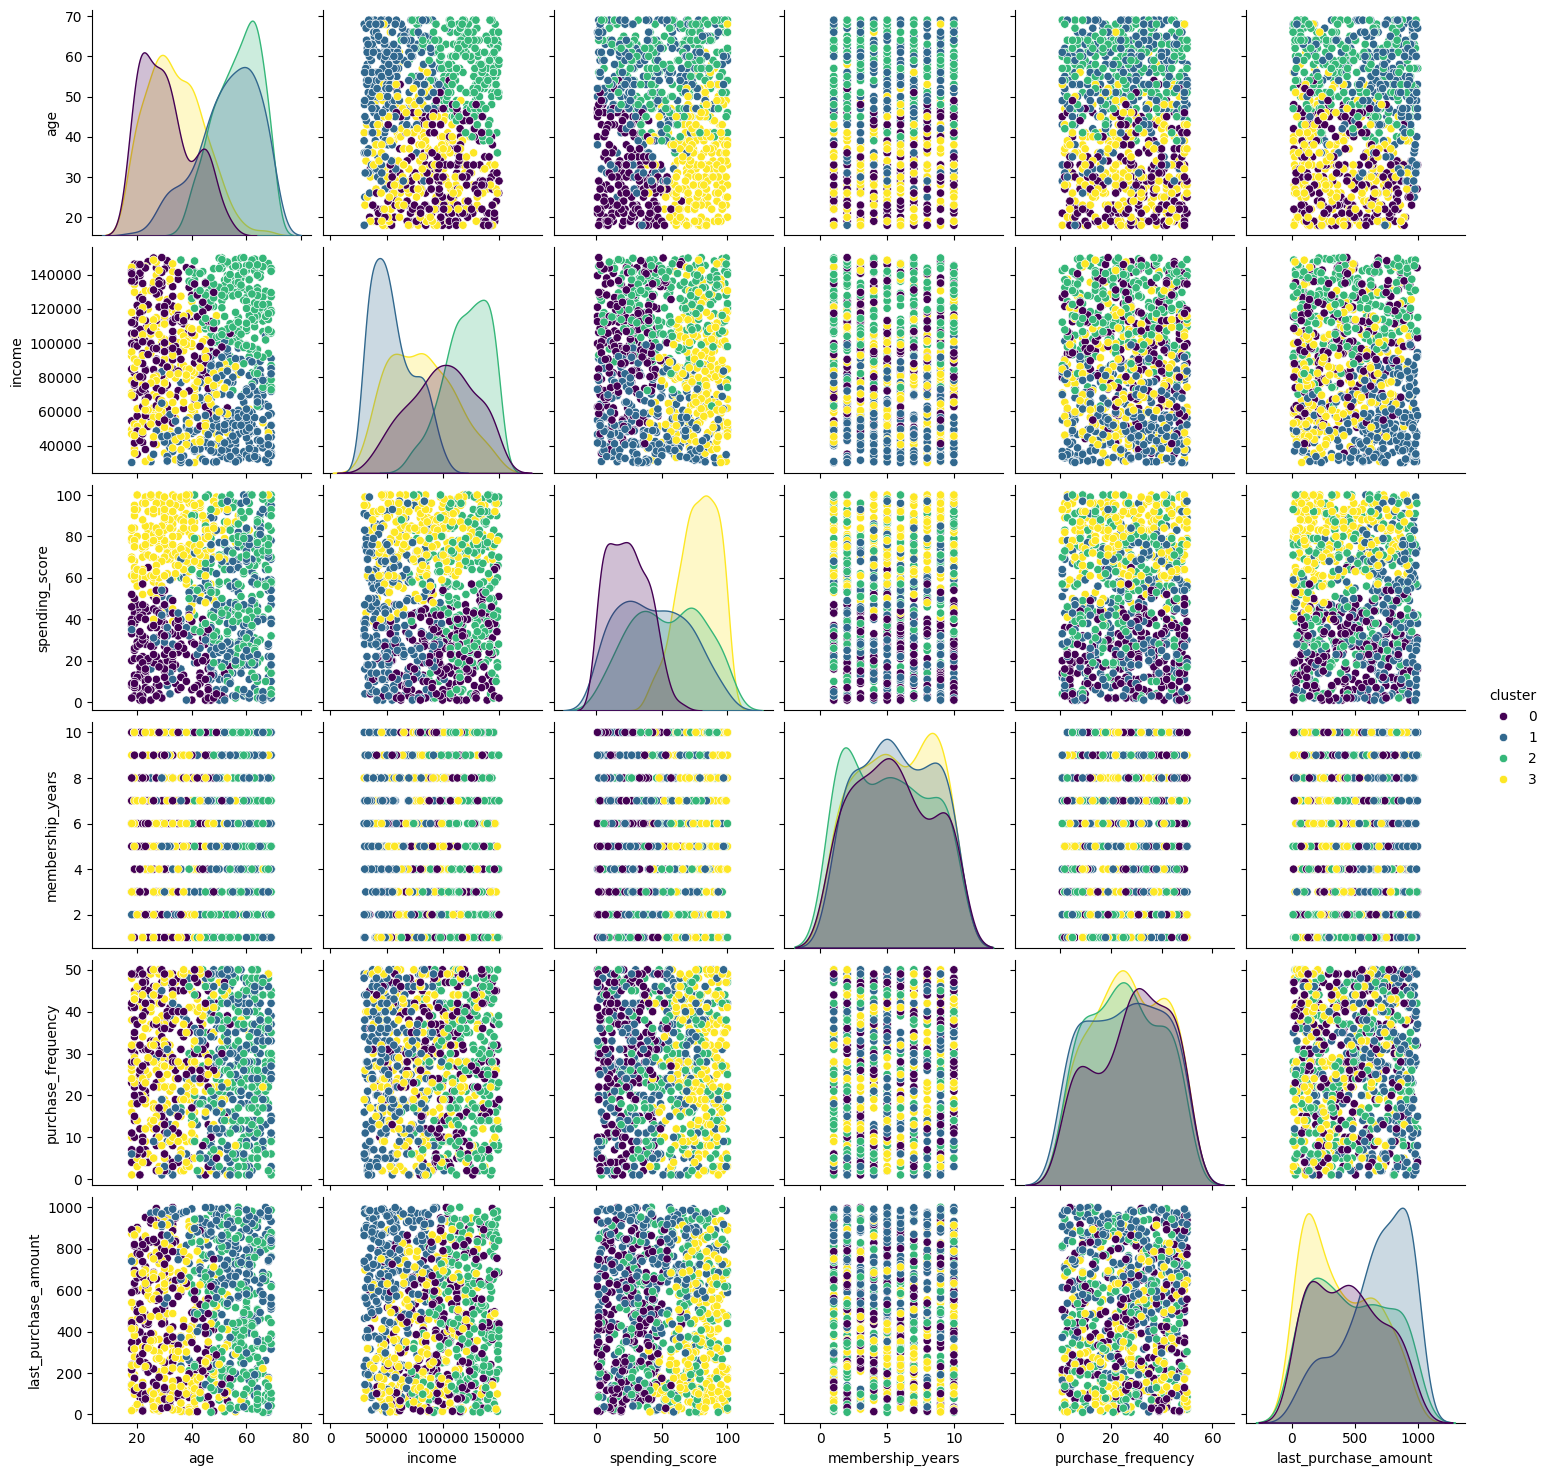

In [30]:
sns.pairplot(df, hue='cluster', vars=numerical_column, palette='viridis')

In [31]:
# Calculate the mean values of the numeric features for each cluster

c = df.groupby('cluster')[numerical_column].mean()

c

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
cluster,,,,,,
0,30.669565,98862.330435,23.839130,5.404348,28.386957,442.921174
1,53.264591,55591.821012,43.319066,5.661479,25.762646,665.218405
2,56.741935,121045.322581,54.358871,5.112903,25.455645,473.450685
3,33.841509,80966.513208,77.690566,5.671698,26.916981,385.282642


# Model Evaluation

In [32]:
from sklearn.metrics import silhouette_score

In [33]:
silhouette_score(x,clusters)

0.12344610239843869

# Summary of Key Characteristics for Each Cluster: